## Assignment 2

In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

# Question 1
Using the equation for full width at half maximum:
$FWHM=2 \sigma \sqrt{2 ln(2)}$

In [2]:
FWHM=2*np.sqrt(2*np.log(2))
print(FWHM)

2.3548200450309493


Using the result above, it's clear that $FWHM$ can be approximated by $FWHM=2.35\sigma$ or $FWHM=2.36\sigma$.

# Question 2

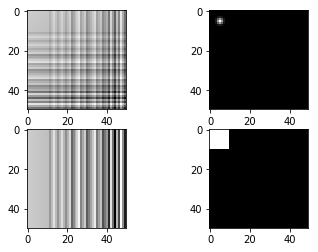

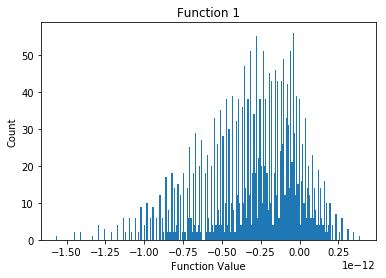

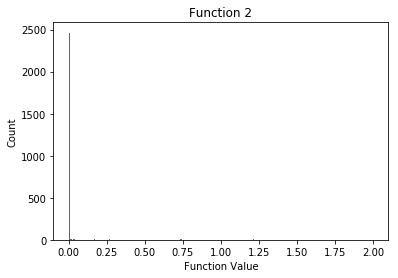

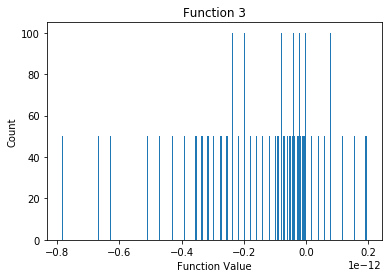

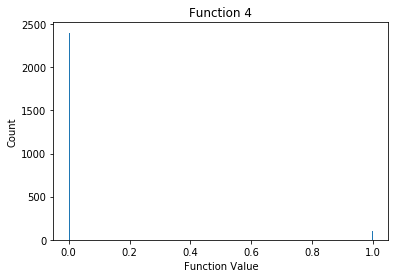

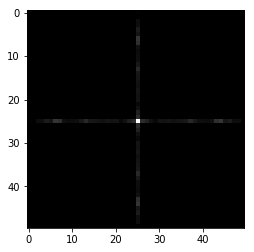

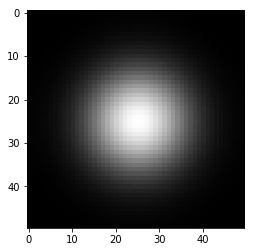

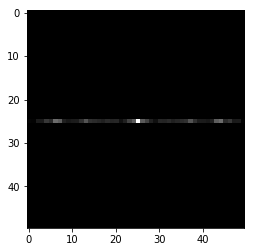

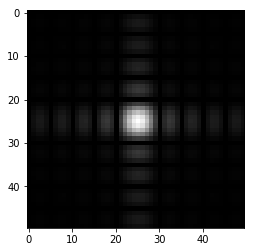

In [3]:
size=50
f0=1
F1=np.zeros((size,size))
F2=np.zeros((size,size))
F3=np.zeros((size,size))
F4=np.zeros((size,size))

for i in range(size):
    for j in range(size):
        F1[i,j]=20*np.sin(2*np.pi*f0*j)+20*np.sin(2*np.pi*f0*i)
        F2[i,j]=2*np.exp(-(((j-5)**2)/2+((i-5)**2)/2))
        F3[i,j]=20*np.sin(2*np.pi*f0*j)
        if i > -10 and i <10 and j>-10 and j<10:
            F4[i,j]=1
        

# Part 1 - Draft the image

plt.subplot(2,2,1) 
plt.imshow(F1, cmap='gray')
plt.subplot(2,2,2) 
plt.imshow(F2, cmap='gray')
plt.subplot(2,2,3) 
plt.imshow(F3, cmap='gray')
plt.subplot(2,2,4) 
plt.imshow(F4, cmap='gray')
plt.show()

# Part 2 - Draft the histogram of the image
plt.hist(F1.ravel(), bins=256); plt.xlabel('Function Value'); plt.ylabel('Count'); plt.title('Function 1')
plt.show()

plt.hist(F2.ravel(), bins=256); plt.xlabel('Function Value'); plt.ylabel('Count'); plt.title('Function 2')
plt.show()

plt.hist(F3.ravel(), bins=256); plt.xlabel('Function Value'); plt.ylabel('Count'); plt.title('Function 3')
plt.show()

plt.hist(F4.ravel(), bins=256); plt.xlabel('Function Value'); plt.ylabel('Count'); plt.title('Function 4')
plt.show()

# Part 3 - Draft the frequency spectrum

F1FFT=np.fft.fft2(F1)
F1FFTMag=abs(F1FFT)*2/size*2/size 
F1FFTMagShift=np.fft.fftshift(F1FFTMag)

F2FFT=np.fft.fft2(F2)
F2FFTMag=abs(F2FFT)*2/size*2/size 
F2FFTMagShift=np.fft.fftshift(F2FFTMag)

F3FFT=np.fft.fft2(F3)
F3FFTMag=abs(F3FFT)*2/size*2/size 
F3FFTMagShift=np.fft.fftshift(F3FFTMag)

F4FFT=np.fft.fft2(F4)
F4FFTMag=abs(F4FFT)*2/size*2/size 
F4FFTMagShift=np.fft.fftshift(F4FFTMag)

plt.imshow(F1FFTMagShift,cmap='gray')
plt.show()

plt.imshow(F2FFTMagShift,cmap='gray')
plt.show()

plt.imshow(F3FFTMagShift,cmap='gray')
plt.show()

plt.imshow(F4FFTMagShift,cmap='gray')
plt.show()




# Question 3

Please see the file labelled "Question 3" for the associated drawings. The wider the point spread function (PSF) the more it smooths out the original function. You'll notice that moving from the original to system 1 to system 2 increases the rounding and decreases resolution as per the attached image file.

# Question 4

a) System 1 is probably the best system overall since system 3 may have questionable results at higher frequencies and may result in noise while system 2 falls off at lower frequencies and doesn't show small objects well since their boundaries are represented by higher frequencies.

b) System 1 is the best for imaging small objects as system 2 falls off at lower frequencies and system 3 would introduce noise at higher frequencies. Higher frequencies are important because higher frequencies hold a lot of the edge data which would be very important if there were many tiny objects.

c) System 1 would show more consistent results but may not show all small objects since it cuts off higher frequencies, but would still show much more than system 2. System 2 would show significantly less as it cuts off at lower frequencies and therefore any high frequency data (edges of the small objects) would be filtered out. 

# Question 5

The minimum $FWHM$ of a PSF for this system would be the field of view divided by the number of pixels. This tells you how "large" your pixel is, which is your resolution. This means the minimum $FWHM$ for the image is $200mm/512 pixels = 0.39 mm / pixel$.

# Question 6

Please see the attached image labelled 'Question 6.'

# Question 7

The abscissa (the "x") axis should be labelled "False-Positive Fraction" while the ordinate (the "y") axis should be labelled "True-Positive Fraction."

The best technique among the three is definitely technique B, as it follows along the line of very low false positives and very high true positives. This means that most declared positives are correct with few errors. 